**Activation Functions**

Experiments with different activation functions

In [1]:
# We use Fashion MNIST dataset, which is provided by Keras
# The following is the code to load data etc. same as last session

# import Keras & Tensorflow
import tensorflow as tf
from tensorflow import keras

# Load image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data preparation:
#   Map intensities from [0--255] to 0.0--1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


**Comparison of different activation functions**

In [2]:
# Try with ReLU activation for hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 113us/sample - loss: 0.7302 - acc: 0.7560 - val_loss: 0.5453 - val_acc: 0.8075
Epoch 2/30
54000/54000 [==============================] - 4s 83us/sample - loss: 0.4884 - acc: 0.8297 - val_loss: 0.4649 - val_acc: 0.8328
Epoch 3/30
54000/54000 [==============================] - 5s 84us/sample - loss: 0.4426 - acc: 0.8438 - val_loss: 0.4287 - val_acc: 0.8482
Epoch 4/30
54000/54000 [==============================] - 5s 84us/sample - loss: 0.4144 - acc: 0.8552 - val_loss: 0.3996 - val_acc: 0.8553
Epoch 5/30
54000/54000 [==============================] - 5s 84us/sample - loss: 0.3937 - acc: 0.8629 - val_loss: 0.4017 - val_acc: 0.8575
Epoch 6/30
54000/54000 [==============================] - 5s 84us/sample - loss: 0.3788 - acc: 0.8659 - val_loss: 0.3834 - val_acc: 0.8607
Epoch 7/30
54000/54000 [===========

[0.33394741475582124, 0.8811]

In [4]:
# Try with tanh activation for hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="tanh"))   
model.add(keras.layers.Dense(100, activation="tanh"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
Tanh_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 84us/sample - loss: 0.6744 - acc: 0.7805 - val_loss: 0.5043 - val_acc: 0.8203
Epoch 2/30
54000/54000 [==============================] - 

[0.340999908554554, 0.8777]

In [10]:
# Try with LeakyReLU activation for hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.layers.LeakyReLU()))
model.add(keras.layers.Dense(100, activation=keras.layers.LeakyReLU()))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
LeakyReLU_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 87us/sample - loss: 0.6917 - acc: 0.7691 - val_loss: 0.5160 - val_acc: 0.8230
Epoch 2/30
54000/54000 [==============================] - 

[0.36236677379608156, 0.8719]

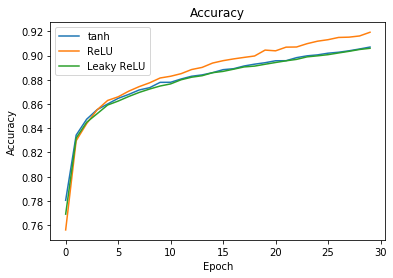

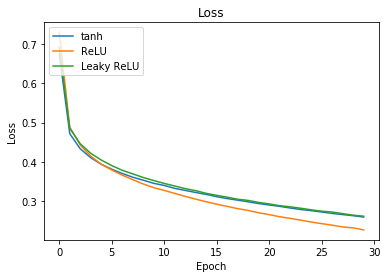

In [17]:
# Visualise loss/accuracy during training
import matplotlib.pyplot as plt

plt.plot(Tanh_history.history['acc'])
plt.plot(ReLU_history.history['acc'])
plt.plot(LeakyReLU_history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['tanh', 'ReLU', 'Leaky ReLU'], loc='upper left')
plt.show()


plt.plot(Tanh_history.history['loss'])
plt.plot(ReLU_history.history['loss'])
plt.plot(LeakyReLU_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tanh', 'ReLU', 'Leaky ReLU'], loc='upper left')
plt.show()


**Evaluation of Regularisation**

In [25]:
# With L2 Regularisation 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))   
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_L2_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_41 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_42 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_43 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                3010      
Total params: 509,410
Trainable params: 509,410
Non-trainable params: 0
_______________________________________________

[0.6696611342906952, 0.8472]

In [24]:
# Without L2 Regularisation 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_noreg_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_36 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_37 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_38 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                3010      
Total params: 509,410
Trainable params: 509,410
Non-trainable params: 0
_______________________________________________

[0.3479011195242405, 0.8858]

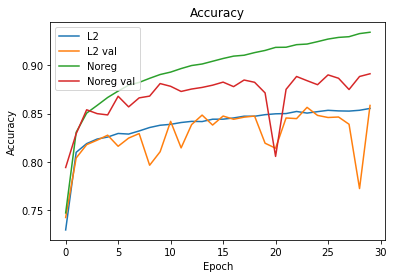

In [26]:
# Plotting

import matplotlib.pyplot as plt

plt.plot(ReLU_L2_history.history['acc'])
plt.plot(ReLU_L2_history.history['val_acc'])
plt.plot(ReLU_noreg_history.history['acc'])
plt.plot(ReLU_noreg_history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['L2', 'L2 val', 'Noreg', 'Noreg val'], loc='upper left')
plt.show()


**Early Stopping**

In [30]:
# Early stopping
# Try with ReLU activation for hidden layers
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 5s 94us/sample - loss: 0.7199 - acc: 0.7649 - val_loss: 0.5309 - val_acc: 0.8192
Epoch 2/60
54000/54000 [==============================] - 5s 88us/sample - loss: 0.4872 - acc: 0.8310 - val_loss: 0.4785 - val_acc: 0.8268
Epoch 3/60
54000/54000 [==============================] - 5s 89us/sample - loss: 0.4402 - acc: 0.8454 - val_loss: 0.5354 - val_acc: 0.7998
Epoch 4/60
54000/54000 [==============================] - 5s 88us/sample - loss: 0.4122 - acc: 0.8541 - val_loss: 0.4062 - val_acc: 0.8542
Epoch 5/60
54000/54000 [==============================] - 5s 90us/sample - loss: 0.3934 - acc: 0.8613 - val_loss: 0.4160 - val_acc: 0.8540
Epoch 6/60
54000/54000 [==============================] - 5s 88us/sample - loss: 0.3784 - acc: 0.8675 - val_loss: 0.3833 - val_acc: 0.8622
Epoch 7/60
54000/54000 [==============================] - 5s 90us/sample - loss: 0.3657 - acc: 0.8716 - val_loss: 0.3

[0.32875157787799836, 0.881]

**Dropout**

In [2]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 6s 107us/sample - loss: 0.9166 - acc: 0.6777 - val_loss: 0.5723 - val_acc: 0.7945
Epoch 2/60
54000/54000 [==============================] - 4s 76us/sample - loss: 0.6254 - acc: 0.7804 - val_loss: 0.5021 - val_acc: 0.8193
Epoch 3/60
54000/54000 [==============================] - 4s 75us/sample - loss: 0.5612 - acc: 0.8000 - val_loss: 0.4583 - val_acc: 0.8317
Epoch 4/60
54000/54000 [==============================] - 4s 77us/sample - loss: 0.5231 - acc: 0.8138 - val_loss: 0.4407 - val_acc: 0.8410
Epoch 5/60
54000/54000 [==============================] - 4s 77us/sample - loss: 0.4987 - acc: 0.8223 - val_loss: 0.4219 - val_acc: 0.8423
Epoch 6/60
54000/54000 [==============================] - 4s 75us/sample - loss: 0.4840 - acc: 0.8254 - val_loss: 0.4105 - val_acc: 0.8503
Epoch 7/60
54000/54000 [===========

[0.3171379440844059, 0.8833]

**Convolutional Neural Network Example**

In [5]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
# reshape: map data to 4D, with the last dimension of 1 channel (grayscale)
history = model.fit(x_train.reshape((x_train.shape[0], 28, 28, 1)), y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 11s 198us/sample - loss: 1.3876 - acc: 0.4864 - val_loss: 0.7114 - val_acc: 0.7133
Epoch 2/60
54000/54000 [==============================] - 10s 192us/sample - loss: 0.7996 - acc: 0.7059 - val_loss: 0.5461 - val_acc: 0.7938
Epoch 3/60
54000/54000 [==============================] - 10s 194us/sample - loss: 0.6577 - acc: 0.7612 - val_loss: 0.4900 - val_acc: 0.8120
Epoch 4/60
54000/54000 [==============================] - 10s 194us/sample - loss: 0.5808 - acc: 0.7919 - val_loss: 0.4756 - val_acc: 0.8268
Epoch 5/60
54000/54000 [==============================] - 10s 193us/sample - loss: 0.5334 - acc: 0.8126 - val_loss: 0.4140 - val_acc: 0.8452
Epoch 6/60
54000/54000 [==============================] - 11s 196us/sample - loss: 0.5011 - acc: 0.8244 - val_loss: 0.3950 - val_acc: 0.8538
Epoch 7/60
54000/54000 [==============================] - 10s 194us/sample - loss: 0.4728 - acc: 0.8345 -

[0.27563044784069063, 0.9085]